In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2023-10-29 13:00:42.220340: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-29 13:00:42.277704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 13:00:42.277842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 13:00:42.277867: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-29 13:00:42.305380: I tensorflow/core/platform/cpu_feature_g

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-29 13:00:43.770984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-29 13:00:43.775102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-29 13:00:43.775198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

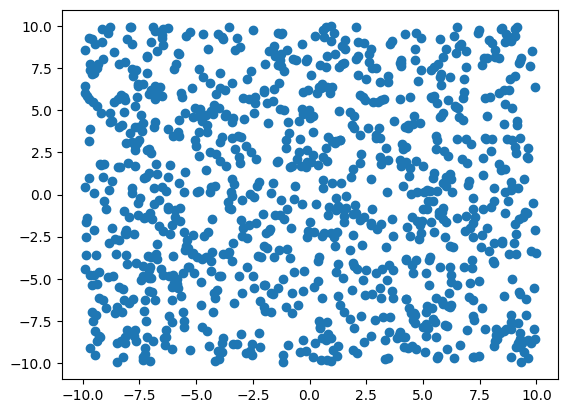

In [2]:
import numpy as np
def tested_function(z):
    return np.cos(np.angle(z)) + np.sin(np.abs(z)) + 2*np.imag(z)
data_size = 1000
data = np.random.uniform(-10, 10, data_size) + 1.j * np.random.uniform(-10, 10, data_size)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.real(data), np.imag(data))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


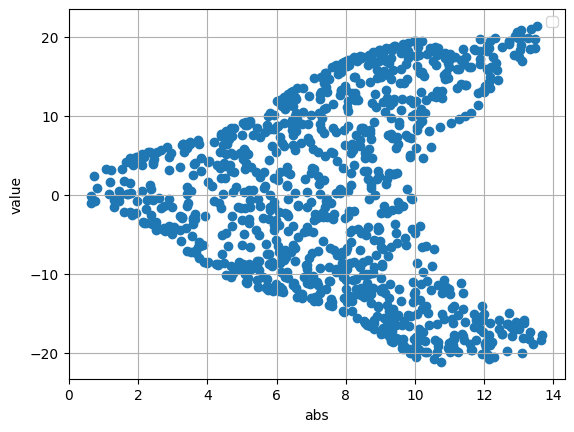

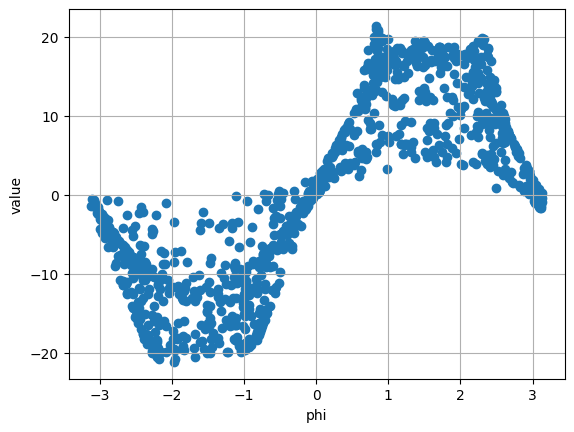

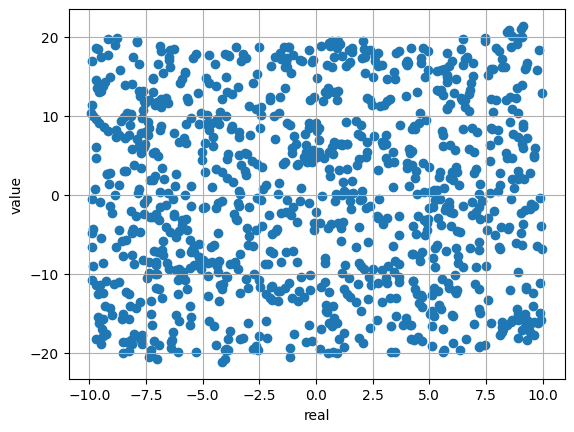

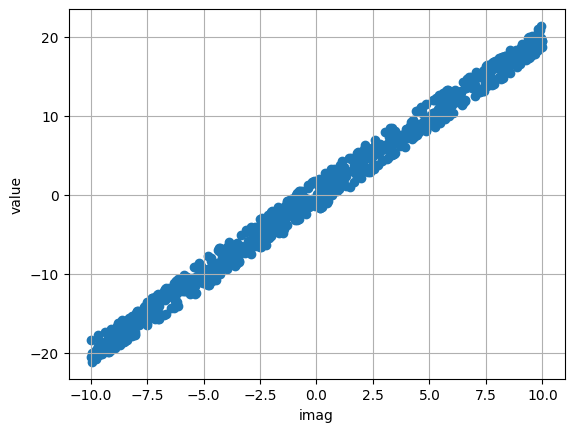

In [3]:
expected_output = tested_function(data)

plt.figure()
# plt.scatter(x_train, y_train, label='Dane treningowe', s=10)
# plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predykcja')
plt.xlabel('abs')
plt.ylabel('value')
plt.legend()
plt.grid(True)
plt.scatter(np.abs(data), expected_output)
plt.show()

plt.figure()
plt.xlabel('phi')
plt.ylabel('value')
plt.grid(True)
plt.scatter(np.angle(data), expected_output)
plt.show()

plt.figure()
plt.xlabel('real')
plt.ylabel('value')
plt.grid(True)
plt.scatter(np.real(data), expected_output)
plt.show()

plt.figure()
plt.xlabel('imag')
plt.ylabel('value')
plt.grid(True)
plt.scatter(np.imag(data), expected_output)
plt.show()

In [4]:
# train_data, test_data = tf.keras.utils.split_dataset(data, left_size=0.8)
rvnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

rvnn_model.compile(optimizer='adam', loss='mean_squared_error')
rvnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-10-29 13:00:44.372226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-29 13:00:44.372345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-29 13:00:44.372404: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
example_batch = data[:10]
print(example_batch)
example_input = [(np.real(z), np.imag(z)) for z in example_batch]
print(example_input)
rvnn_model.predict(example_input)

[ 3.97051868-8.1816023j   4.67861067-3.88831035j  6.48713285-5.37142434j
 -8.23481812-5.61384328j  4.74613878+0.16093486j  1.50140918-6.96210959j
 -7.33484221-9.64764055j  7.54051937-3.14074901j  0.72489153+2.74123117j
 -6.33927124-8.46113631j]
[(3.970518679394333, -8.181602300881368), (4.678610670517688, -3.8883103506551713), (6.487132853321931, -5.371424335045372), (-8.234818121042718, -5.613843283846043), (4.7461387831875435, 0.16093486147391545), (1.5014091770583615, -6.962109590217544), (-7.334842213536317, -9.6476405471876), (7.540519370644422, -3.140749011267503), (0.7248915345180489, 2.741231170534096), (-6.339271241175373, -8.461136308301807)]
1/1 [==============================] - 1s 657ms/step


array([[0.33194327],
       [0.12120289],
       [0.16945958],
       [3.202269  ],
       [0.49142015],
       [0.55146515],
       [3.4543767 ],
       [0.34192026],
       [0.42833805],
       [3.0039642 ]], dtype=float32)

In [6]:
input2D = [(np.real(z), np.imag(z)) for z in data]
rvnn_history = rvnn_model.fit(np.array(input2D), expected_output, epochs=300, validation_split=0.2, verbose=1)

Epoch 1/300


2023-10-29 13:00:46.136719: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f541d7e8f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-29 13:00:46.136733: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-10-29 13:00:46.140796: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-29 13:00:46.238072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-29 13:00:46.290557: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 [==============================] - 1s 5ms/step - loss: 122.2505 - val_loss: 120.3759
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 94.2710 - val_loss: 92.0617
Epoch 3/300
25/25 [==============================] - 0s 1ms/step - loss: 69.8995 - val_loss: 67.2264
Epoch 4/300
25/25 [==============================] - 0s 1ms/step - loss: 49.0970 - val_loss: 45.0700
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 31.3851 - val_loss: 27.0068
Epoch 6/300
25/25 [==============================] - 0s 1ms/step - loss: 17.8410 - val_loss: 14.1502
Epoch 7/300
25/25 [==============================] - 0s 1ms/step - loss: 8.8264 - val_loss: 6.5709
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 3.9313 - val_loss: 2.7352
Epoch 9/300
25/25 [==============================] - 0s 1ms/step - loss: 1.7036 - val_loss: 1.2904
Epoch 10/300
25/25 [==============================] - 0s 1ms/step - loss: 0.9376 - val_loss: 0.8108
Epoch 1

val_loss 0.5284333229064941


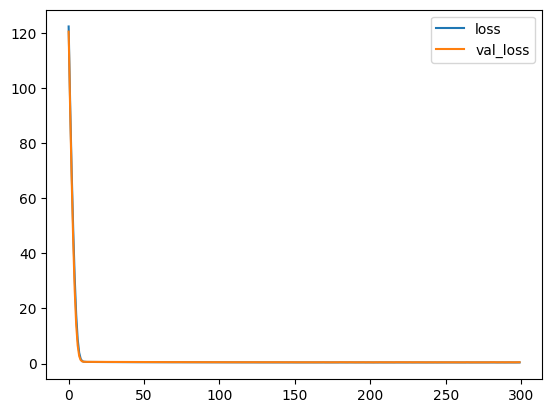

In [7]:
import pandas as pd
df = pd.DataFrame(rvnn_history.history)
df['epoch'] = rvnn_history.epoch

plt.figure()
# plt.title(activation_function)
plt.plot(df['epoch'], df['loss'], label='loss')
plt.plot(df['epoch'], df['val_loss'], label='val_loss')
plt.legend()
plt.plot()
print('val_loss', df['val_loss'].tail(1).values[0])

In [8]:
import cvnn.layers as complex_layers

complex_to_real = ['cast_to_real', 'sigmoid_real', 'softmax_real_with_abs', 'softmax_real_with_avg', 'softmax_real_with_mult', 'softmax_of_softmax_real_with_mult', 'softmax_of_softmax_real_with_avg', 'convert_to_real_with_abs', 'softmax_real_with_polar']

cvnn_history = []
for activation_function in complex_to_real:
    print(activation_function)
    cvnn_model = tf.keras.Sequential([
        complex_layers.ComplexInput(input_shape=(1,)),
        complex_layers.ComplexDense(48, activation='complex_cardioid'),
        complex_layers.ComplexDense(1, activation=activation_function)
        # tf.keras.layers.Dense(1)
        # complex_layers.ComplexDense(1, activation='linear')
    ])

    cvnn_model.compile(optimizer='adam', loss='mean_squared_error')
    cvnn_history.append(cvnn_model.fit(np.array(data), expected_output, epochs=300, validation_split=0.2, verbose=0))

cast_to_real
sigmoid_real
softmax_real_with_abs
softmax_real_with_avg
softmax_real_with_mult
softmax_of_softmax_real_with_mult
softmax_of_softmax_real_with_avg
convert_to_real_with_abs
softmax_real_with_polar


val_loss 0.5190532803535461
val_loss 139.7908172607422
val_loss 150.1417236328125
val_loss 150.1417236328125
val_loss 150.1417236328125
val_loss 150.1417236328125
val_loss 150.1417236328125
val_loss 70.62539672851562
val_loss 150.1417236328125


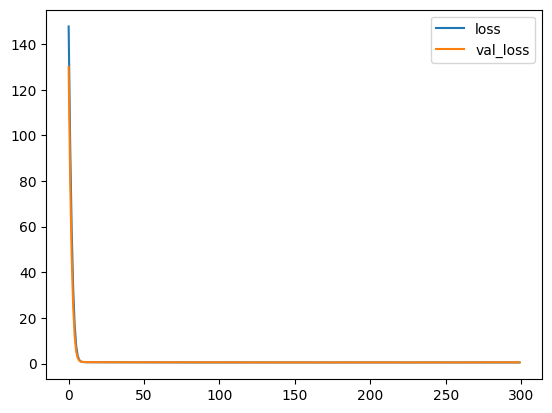

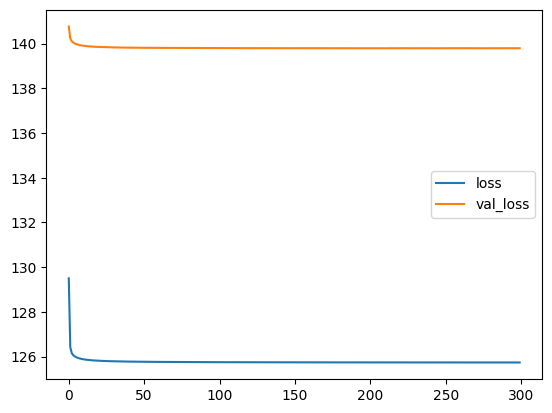

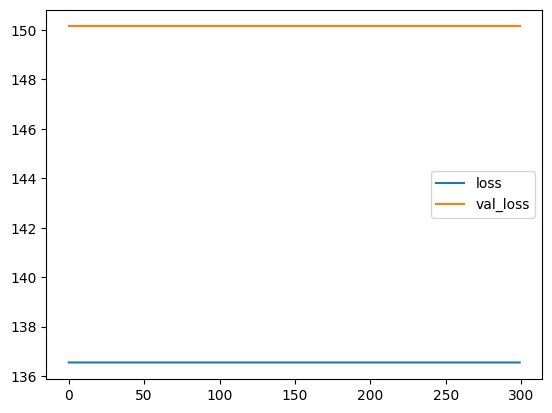

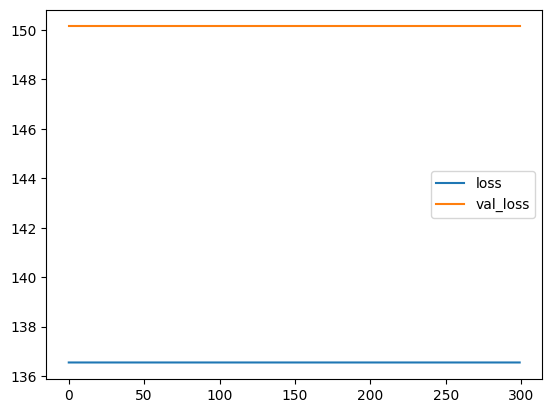

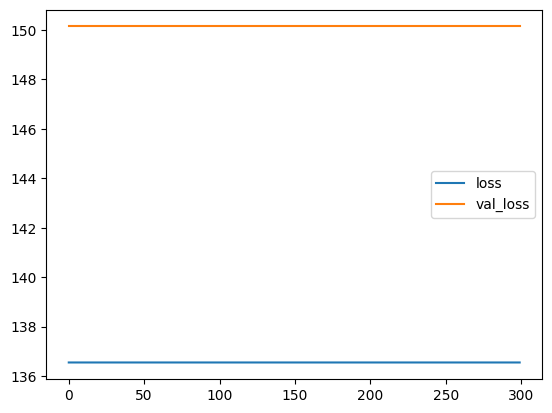

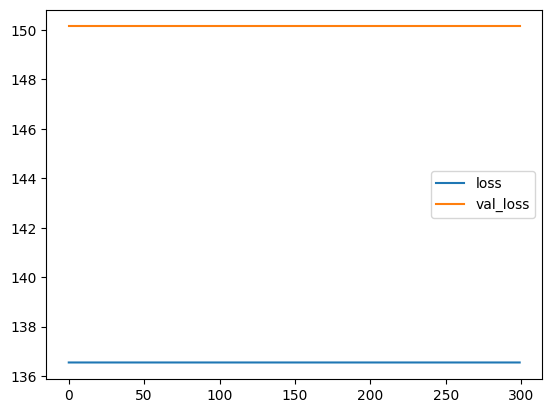

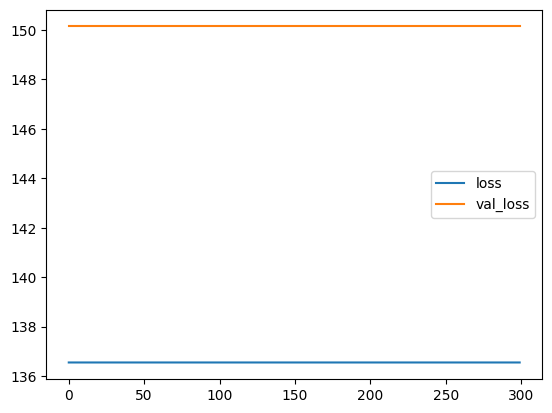

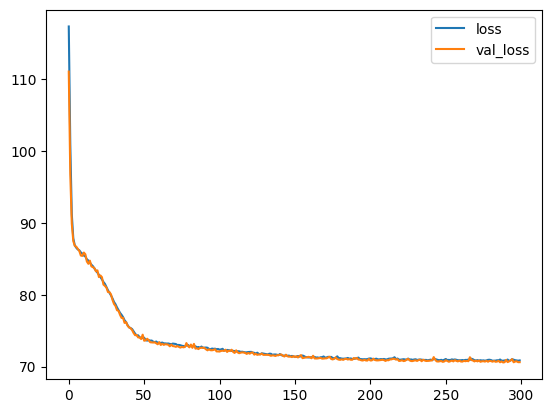

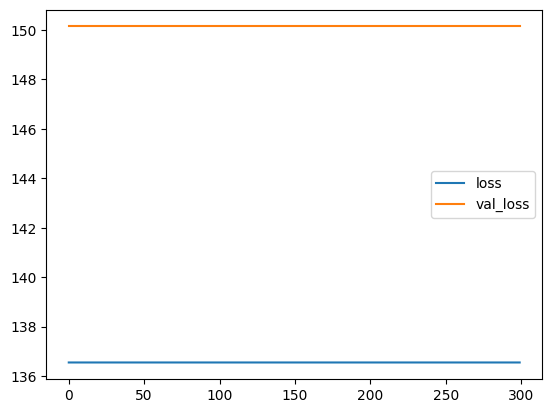

In [9]:
for history in cvnn_history:
    df = pd.DataFrame(history.history)
    df['epoch'] = history.epoch

    plt.figure()
    # plt.title(activation_function)
    plt.plot(df['epoch'], df['loss'], label='loss')
    plt.plot(df['epoch'], df['val_loss'], label='val_loss')
    plt.legend()
    plt.plot()
    print('val_loss', df['val_loss'].tail(1).values[0])

## spacer

In [10]:

cvnn_model = tf.keras.models.Sequential()
cvnn_model.add(complex_layers.ComplexInput(input_shape=(1,)))
cvnn_model.add(complex_layers.ComplexDense(units=42, activation='complex_cardioid'))
cvnn_model.add(complex_layers.ComplexDense(units=1, activation='cast_to_real'))
cvnn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])
cvnn_model.summary()
cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=500, validation_split=0.2, verbose=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_dense_18 (ComplexD  (None, 42)                168       
 ense)                                                           
                                                                 
 complex_dense_19 (ComplexD  (None, 1)                 86        
 ense)                                                           
                                                                 
Total params: 254 (1016.00 Byte)
Trainable params: 254 (1016.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500


25/25 [==============================] - 1s 5ms/step - loss: 96.0755 - mean_absolute_error: 8.3510 - mean_absolute_percentage_error: 88.4785 - val_loss: 81.1131 - val_mean_absolute_error: 7.9794 - val_mean_absolute_percentage_error: 79.7168
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 58.2288 - mean_absolute_error: 6.4419 - mean_absolute_percentage_error: 71.2398 - val_loss: 46.1017 - val_mean_absolute_error: 5.9794 - val_mean_absolute_percentage_error: 66.6252
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 31.9463 - mean_absolute_error: 4.7064 - mean_absolute_percentage_error: 57.3311 - val_loss: 23.6106 - val_mean_absolute_error: 4.2242 - val_mean_absolute_percentage_error: 54.9869
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 15.6806 - mean_absolute_error: 3.2342 - mean_absolute_percentage_error: 46.1704 - val_loss: 10.5864 - val_mean_absolute_error: 2.7517 - val_mean_absolute_percentage_error: 46.4646


In [11]:
df = pd.DataFrame(cvnn_history.history)
df['epoch'] = cvnn_history.epoch
df

,loss,mean_absolute_error,mean_absolute_percentage_error,val_loss,val_mean_absolute_error,val_mean_absolute_percentage_error,epoch
0,96.075462,8.351021,88.478477,81.113075,7.979423,79.716766,0
1,58.228813,6.441936,71.239777,46.101696,5.979373,66.625244,1
2,31.946321,4.706397,57.331074,23.610579,4.224185,54.986862,2
3,15.680645,3.234218,46.170444,10.586431,2.751712,46.464588,3
4,6.734598,2.081583,38.387177,4.380325,1.696522,41.270996,4
...,...,...,...,...,...,...,...
495,0.446607,0.583270,20.167006,0.467850,0.605202,25.587568,495
496,0.449805,0.584978,19.236822,0.470307,0.603994,25.462238,496
497,0.450186,0.587201,21.140606,0.488336,0.618487,26.218243,497
498,0.448364,0.588671,20.237072,0.541866,0.646054,26.884512,498


[]

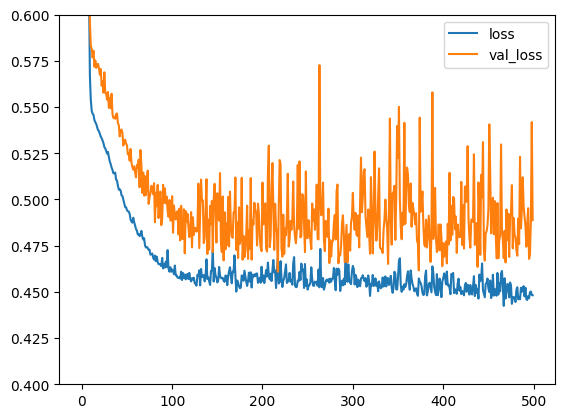

In [12]:
plt.figure()
plt.ylim((0.4, 0.6))
plt.plot(df['epoch'], df['loss'], label='loss')
plt.plot(df['epoch'], df['val_loss'], label='val_loss')
plt.legend()
plt.plot()